In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.stats import norm as Gauss
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [2]:
##### 2024_04_06_Wilks_fixed_NP_h_0.6732, 2024_04_10_Wilks_fixed_NP_h_0.6732
h_hat = np.array([6.732645e-01 , 6.726220e-01 , 6.726354e-01 , 6.728106e-01 , 6.748948e-01 , 6.738186e-01 , 6.733158e-01 , 6.729469e-01 , 6.729908e-01 , 6.720063e-01 , 6.752873e-01 , 6.732181e-01 , 6.733970e-01 , 6.720048e-01 , 6.738744e-01 , 6.726562e-01 , 6.747429e-01 , 6.731155e-01 , 6.730333e-01 , 6.733395e-01 , 6.732948e-01 , 6.747323e-01 , 6.732890e-01 , 6.736833e-01 , 6.741442e-01 , 6.715553e-01 , 6.726177e-01 , 6.725036e-01 , 6.745615e-01 , 6.731824e-01 , 6.713698e-01 , 6.753505e-01 , 6.720521e-01 , 6.729991e-01 , 6.731324e-01 , 6.724933e-01 , 6.732316e-01 , 6.719675e-01 , 6.735771e-01 , 6.734978e-01 , 6.715961e-01 , 6.744548e-01 , 6.732331e-01 , 6.737510e-01 , 6.740256e-01 , 6.731264e-01, 6.735097e-01 , 6.724404e-01 , 6.742934e-01 , 6.737790e-01 , 6.717355e-01 , 6.736053e-01 , 6.735012e-01 , 6.736919e-01 , 6.763646e-01 , 6.731204e-01 , 6.726917e-01 , 6.738680e-01 , 6.723610e-01 , 6.728604e-01 , 6.717520e-01 , 6.731319e-01 , 6.716012e-01 , 6.733729e-01 , 6.738300e-01 , 6.731579e-01 , 6.725604e-01 , 6.742959e-01 , 6.745375e-01 , 6.746211e-01 , 6.725864e-01 , 6.729168e-01 , 6.733004e-01 , 6.728271e-01 , 6.727892e-01 , 6.729668e-01 , 6.729342e-01 , 6.725869e-01 , 6.741335e-01 , 6.735038e-01 , 6.734873e-01 , 6.733402e-01 , 6.729404e-01 , 6.729954e-01 , 6.739790e-01 , 6.737915e-01 , 6.735316e-01 , 6.735361e-01 , 6.731341e-01 , 6.730057e-01 , 6.717962e-01 , 6.734657e-01 , 6.716084e-01 , 6.725272e-01 , 6.723099e-01 , 6.730992e-01 , 6.737783e-01 , 6.747712e-01 , 6.730133e-01 , 6.723823e-01 , 6.741746e-01 , 6.729960e-01 , 6.724872e-01 , 6.726874e-01 , 6.721728e-01 , 6.739156e-01 , 6.742280e-01 , 6.730900e-01 , 6.730782e-01 , 6.721602e-01 , 6.731760e-01 , 6.741817e-01 , 6.740533e-01 , 6.735266e-01 , 6.736838e-01 , 6.738549e-01 , 6.737115e-01 , 6.726365e-01 , 6.717636e-01 , 6.716628e-01 , 6.718913e-01 , 6.728462e-01 , 6.706856e-01 , 6.712310e-01 , 6.725413e-01 , 6.738742e-01 , 6.735803e-01 , 6.726378e-01 , 6.723403e-01 , 6.718600e-01 , 6.726691e-01 , 6.724126e-01 , 6.737523e-01 , 6.732192e-01 , 6.722744e-01 , 6.731355e-01 , 6.730419e-01 , 6.717169e-01 , 6.717392e-01 , 6.721534e-01 , 6.739511e-01 , 6.719695e-01 , 6.724599e-01 , 6.730252e-01 , 6.726130e-01 , 6.724666e-01 , 6.724808e-01 , 6.744522e-01 , 6.702176e-01 , 6.730952e-01 , 6.735773e-01 , 6.737932e-01 , 6.741532e-01 , 6.718804e-01 , 6.731621e-01 , 6.733617e-01 , 6.729500e-01 , 6.730453e-01 , 6.734807e-01 , 6.734609e-01 , 6.728271e-01 , 6.722644e-01 , 6.740339e-01 , 6.735077e-01 , 6.732613e-01 , 6.743091e-01 , 6.732013e-01 , 6.735347e-01 , 6.729903e-01 , 6.726388e-01 , 6.729109e-01 , 6.748989e-01 , 6.736486e-01 , 6.733013e-01 , 6.725278e-01 , 6.739151e-01 , 6.740904e-01 , 6.719688e-01 , 6.734542e-01 , 6.722786e-01 , 6.735054e-01 , 6.739110e-01 , 6.738999e-01 , 6.720357e-01 , 6.715598e-01 , 6.728279e-01 , 6.747397e-01 , 6.717148e-01 , 6.741279e-01 , 6.730772e-01 , 6.724548e-01 , 6.717296e-01 , 6.735658e-01 , 6.733120e-01 , 6.745167e-01 , 6.727616e-01, 6.734563e-01 , 6.714040e-01 , 6.718164e-01 , 6.743686e-01 , 6.713654e-01 , 6.731208e-01 , 6.746809e-01 , 6.729001e-01 , 6.725554e-01 , 6.727238e-01 , 6.721120e-01 , 6.732196e-01 , 6.735845e-01 , 6.716682e-01 , 6.724316e-01 , 6.741525e-01 , 6.731523e-01 , 6.723037e-01 , 6.743098e-01 , 6.725878e-01 , 6.733797e-01 , 6.736195e-01 , 6.722303e-01 , 6.734139e-01 , 6.744310e-01 , 6.737437e-01 , 6.737988e-01 , 6.728043e-01 , 6.729009e-01 , 6.735872e-01 , 6.736473e-01 , 6.723226e-01 , 6.715426e-01 , 6.737926e-01 , 6.740132e-01 , 6.735863e-01 , 6.749681e-01 , 6.731045e-01 , 6.720542e-01 , 6.735063e-01 , 6.718733e-01 , 6.736773e-01 , 6.733261e-01 , 6.720897e-01 , 6.725925e-01 , 6.739708e-01 , 6.749669e-01 , 6.732127e-01 , 6.722704e-01 , 6.742637e-01 , 6.737657e-01 , 6.736420e-01 , 6.745992e-01 , 6.747922e-01])
lnL_hat = -np.array([339.31, 302.81, 284.16, 348.46, 306.99, 298.15, 291.85, 303.38, 301.64, 333.81, 303.44, 331.27, 308.52, 335.12, 311.00, 327.36, 293.50, 282.84, 315.27, 300.48, 318.64, 301.04, 275.44, 324.31, 330.67, 338.51, 306.68, 300.80, 290.91, 301.94, 306.77, 305.17, 302.05, 281.85, 304.82, 300.51, 293.00, 285.17, 310.50, 317.54, 305.61, 321.65, 294.94, 300.18, 304.87, 307.17, 300.89, 296.60, 314.80, 317.53, 306.31, 298.81, 320.55, 337.10, 288.32, 292.40, 287.32, 294.80, 286.52, 307.09, 291.10, 296.26, 313.95, 309.14, 333.23, 290.87, 315.32, 275.28, 332.71, 298.22, 340.66, 298.53, 284.56, 300.03, 302.32, 329.94, 310.94, 294.39, 309.39, 262.82, 317.00, 296.97, 289.84, 286.39, 311.26, 309.55, 304.39, 296.52, 304.03, 282.41, 310.52, 285.82, 291.56, 300.75, 310.80, 356.00, 308.35, 304.52, 291.97, 260.42, 297.31, 301.17, 276.89, 297.35, 271.04, 304.28, 314.92, 308.41, 313.28, 344.62, 296.77, 283.99, 290.75, 310.72, 334.43, 276.43, 317.68, 312.99, 285.09, 272.24, 302.59, 321.12, 319.27, 320.37, 275.67, 329.61, 259.24, 305.81, 317.44, 299.92, 318.50, 290.64, 275.95, 300.78, 291.34, 332.64, 311.06, 324.66, 339.51, 297.42, 319.25, 323.83, 342.64, 298.42, 280.18, 280.07, 341.67, 291.69, 305.25, 327.01, 315.09, 314.38, 296.49, 343.69, 267.48, 301.36, 310.27, 298.29, 308.15, 308.98, 308.57, 344.88, 304.45, 308.62, 300.14, 305.56, 285.51, 279.81, 306.80, 322.14, 315.71, 280.47, 315.27, 313.96, 309.96, 320.18, 300.61, 317.41, 311.93, 291.77, 307.21, 293.29, 299.91, 321.62, 314.45, 311.39, 304.17, 296.13, 313.98, 292.15, 303.34, 298.11, 297.24, 315.69, 296.49, 321.48, 330.80, 310.34, 300.50, 309.78, 303.95, 331.95, 282.38, 284.74, 298.57, 304.25, 287.66, 297.96, 312.01, 314.04, 316.22, 307.06, 328.93, 302.56, 289.86, 309.83, 293.50, 287.61, 307.34, 286.51, 312.16, 295.76, 316.48, 312.96, 307.87, 315.48, 298.57, 289.61, 319.39, 270.60, 305.68, 269.67, 307.41, 294.28, 334.18, 323.42, 309.43, 282.46, 323.87, 299.71, 334.16, 321.19, 299.99, 295.01, 309.26, 297.80, 270.02, 300.88, 318.03, 293.80])
lnL_tru = -np.array([339.32, 303.05, 284.36, 348.57, 308.61, 298.42, 291.89, 303.42, 301.68, 334.67, 305.84, 331.29, 308.55, 335.95, 311.30, 327.54, 294.77, 282.85, 315.29, 300.50, 318.66, 302.42, 275.45, 324.47, 331.12, 340.12, 306.92, 301.12, 292.05, 301.96, 308.64, 307.71, 302.87, 281.90, 304.85, 300.85, 293.02, 286.08, 310.59, 317.58, 307.05, 322.50, 294.96, 300.39, 305.27, 307.18, 300.94, 296.94, 315.52, 317.71, 307.53, 298.91, 320.61, 337.27, 294.13, 292.42, 287.47, 295.11, 287.00, 307.15, 292.27, 296.27, 315.55, 309.17, 333.47, 290.89, 315.55, 276.04, 333.69, 299.51, 340.92, 298.59, 284.57, 300.13, 302.44, 329.98, 311.05, 294.63, 309.93, 262.87, 317.06, 296.98, 289.88, 286.43, 311.60, 309.75, 304.49, 296.62, 304.05, 282.43, 311.64, 285.89, 293.14, 301.01, 311.27, 356.00, 308.58, 305.94, 292.00, 260.87, 297.85, 301.21, 277.21, 297.51, 271.67, 304.68, 315.61, 308.42, 313.31, 345.24, 296.77, 284.51, 291.19, 310.78, 334.64, 276.63, 317.86, 313.13, 286.30, 273.55, 303.55, 321.26, 323.18, 322.64, 275.89, 329.85, 259.33, 306.00, 317.91, 300.92, 318.63, 291.06, 276.17, 300.79, 291.89, 332.65, 311.09, 325.98, 340.92, 298.06, 319.59, 324.76, 342.97, 298.44, 280.42, 280.38, 341.99, 292.59, 310.48, 327.03, 315.18, 314.58, 297.10, 344.65, 267.49, 302.45, 310.32, 298.31, 308.22, 309.04, 308.65, 345.37, 304.83, 308.66, 300.15, 306.23, 285.52, 279.90, 306.83, 322.41, 315.79, 282.22, 315.39, 313.98, 310.29, 320.46, 301.02, 318.23, 312.00, 292.35, 307.27, 293.64, 300.30, 322.41, 315.93, 311.46, 305.62, 297.46, 314.47, 292.18, 303.74, 299.34, 297.34, 315.72, 297.51, 321.59, 330.84, 312.16, 301.62, 310.50, 305.95, 331.96, 283.70, 284.79, 298.80, 304.41, 288.32, 297.96, 312.09, 315.51, 316.57, 307.63, 328.93, 302.99, 290.56, 310.06, 293.51, 287.73, 307.93, 286.54, 313.10, 295.90, 316.68, 313.06, 307.93, 315.56, 298.66, 290.05, 321.05, 270.81, 306.03, 269.73, 309.24, 294.28, 334.95, 323.49, 310.48, 282.64, 323.89, 300.33, 334.29, 321.57, 301.91, 295.02, 309.77, 298.52, 270.21, 300.98, 319.12, 295.27])

# Asimov data set
hs_asimov   =   np.array([0.669, 0.670, 0.671, 0.672, 0.6732, 0.674, 0.675, 0.676, 0.677])
chi2_asimov = 2*np.array([10.43,  6.05,  2.85,  0.85,   0.00,  0.38,  1.90,  4.59,  8.45])

# Compute likelihood ratio
LR = -2*(lnL_tru - lnL_hat)
print("max LR: ", np.max(LR))

max LR:  11.620000000000005


In [3]:
# LR alternative settings
bin_max_alt = 44.

# LR settings
bin_width = 0.5
bin_max = 12
bins = np.arange(0, bin_max, bin_width)
bins_fine = np.arange(0, bin_max_alt, bin_width/10.)
N_LR = len(LR)
nbins = len(bins)
norm = bin_width*N_LR

bins_alt = np.arange(0, bin_max_alt, bin_width)
bins_fine_alt = np.arange(0, bin_max_alt, bin_width/10.)

# h settings
h_true = 0.6732
h_alt = 0.682
h_lim = 0.006
h_bin_width = h_lim/10.
h_bins = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width)
h_bins_fine = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width/10.)
norm_h = h_bin_width*N_LR

In [4]:
# Set fonts
plt.rc('font',**{'family':'Helvetica','size':16})
plt.rc('text', usetex=True)
font = {'family':'Helvetica',
        'color' : 'black',
        'size'  :  16}

In [5]:
# Define a parabola
def parab(x, a,b,c):
    return a + b * (x-c)**2.

MLE:  0.6732077560959784
1 sigma:  0.0009218073789173387


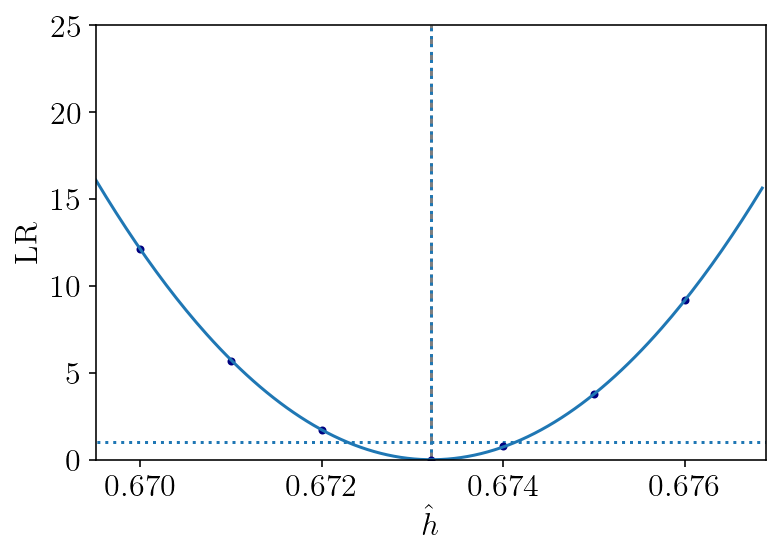

In [8]:
#### Compute Asimov error

#Fit parabola
[a,b,c], pcov = curve_fit(parab, hs_asimov, chi2_asimov, p0=[0.72, 1185714, 0.67], maxfev=30000)
fit_x = h_bins_fine
fit_y = b * (fit_x-c)**2.
parabola_min = a

# Find intersection of parabola with \Delta\chi^2 = 1
def parabola(x):
    return b * (x-c)**2. -1
print("MLE: ", c)
zeros = fsolve(parabola, x0=[0.60,0.70])
sigma = (zeros[1]-zeros[0])/2.
print("1 sigma: ", sigma)
sigma_asimov = sigma

# Plot
plt.plot(hs_asimov, chi2_asimov, marker=".", ls="", color="navy")
plt.plot(fit_x, fit_y, color='tab:blue', ls='-')
plt.vlines(h_true, 0, 25, color="grey", ls="--")
plt.vlines(c, 0, 25, color="tab:blue", ls=":")
plt.hlines(1, 0.65, 0.70, color="tab:blue", ls=":")
plt.ylabel("LR")
plt.xlabel(r"$\hat h$")
plt.ylim([0,25])
plt.xlim([h_true-h_lim, h_true+h_lim])
plt.show()

In [9]:
# Adopt h bins
h_lim = 4*sigma_asimov
h_bin_width = h_lim/10.
h_bins = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width)
h_bins_fine = np.arange(h_true-h_lim, h_true+h_lim, h_bin_width/10.)
norm_h = h_bin_width*N_LR

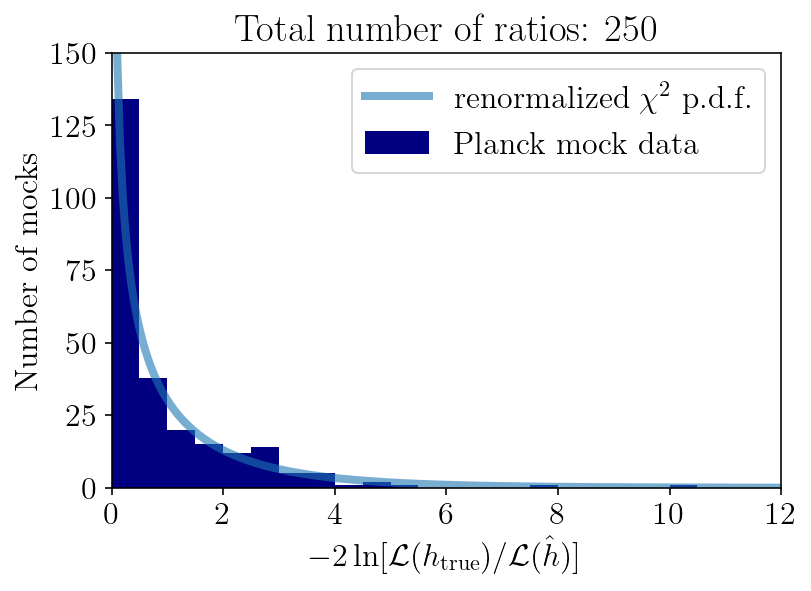

In [10]:
# Plot LR histogram
plt.hist(LR, bins=bins, color="navy", label="Planck mock data")
plt.plot(bins_fine, norm*chi2.pdf(bins_fine, df=1), color="tab:blue", lw=4, alpha=0.6, label=r'renormalized $\chi^2$ p.d.f.')
plt.xlim([0,bin_max])
plt.ylim([0,150])
plt.xlabel(r"$-2\ln[{\mathcal{L}(h_\mathrm{true})}/{\mathcal{L}(\hat{h})}]$")
plt.ylabel("Number of mocks")
plt.title("Total number of ratios: "+str(N_LR))
plt.legend()
plt.show()

/Users/lherold/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


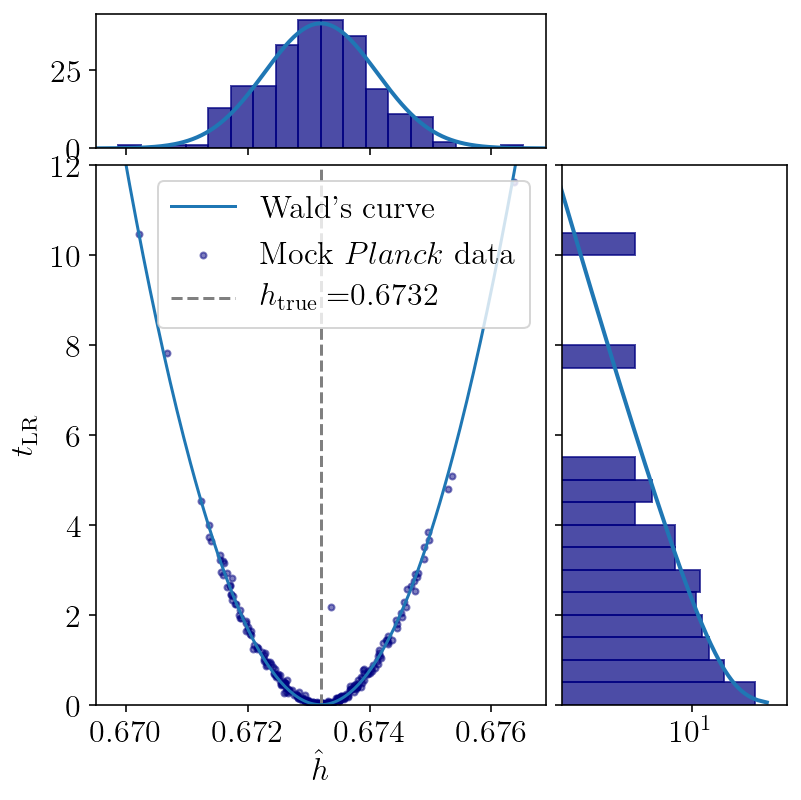

In [12]:
#### LR triangle plot
# Initialise plot
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 2), height_ratios=(1, 4), left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# Center plot
ax.scatter(h_hat, LR, color="navy", marker=".", label=r"Mock ${Planck}$ data", alpha=0.5)
ax.plot(h_bins_fine, (h_bins_fine-h_true)**2/sigma_asimov**2, color='tab:blue', ls='-', label="Wald's curve")
ax.vlines(h_true, 0, bin_max_alt, ls="--", color="grey", label=r"$h_\mathrm{true} = $"+str(h_true))
ax.set_xlim([h_true-h_lim, h_true+h_lim])
ax.set_ylim([0,bin_max])
ax.set_xlabel(r"$\hat h$")
ax.set_ylabel(r"$t_\mathrm{LR}$")
ax.legend()

# Hist x
ax_histx.hist(h_hat, bins=h_bins, color="navy", alpha=0.7, edgecolor='navy')
ax_histx.plot(h_bins_fine, norm_h*Gauss.pdf(h_bins_fine, loc=h_true, scale=sigma_asimov), color='tab:blue', lw=2)

# Hist y
ax_histy.hist(LR, bins=bins, orientation='horizontal', color="navy", alpha=0.7, edgecolor='navy')
ax_histy.plot(norm*chi2.pdf(bins_fine, df=1), bins_fine, color='tab:blue', lw=2)
ax_histy.set_xlim([5e-2,5e2])
ax_histy.set_xscale("log")

plt.tight_layout()
plt.savefig("LR_hist_fixed_NP_h.pdf", format="PDF", bbox_inches='tight')
plt.show()

In [13]:
# Find \Delta\chi^2 for which 68.27% of mocks are below
LR_cutoff = 0.98
print(100*np.count_nonzero(LR<LR_cutoff)/len(LR), "% of mocks below: ", LR_cutoff)

68.0 % of mocks below:  0.98


In [15]:
# Compare sigma_asimov and sigma_mocks:
print("sigma_asimov: ", sigma_asimov)
print("sigma_mocks: ", np.std(h_hat))

sigma_asimov:  0.0009218073789173387
sigma_mocks:  0.0009117578734713283
